# Working with distributions

In [1]:
import preliz as pz
import numpy as np

In [2]:
pz.style.use("preliz-doc")

PreliZ offers a large variety of distributions, you can check them in the [Gallery](https://preliz.readthedocs.io/en/latest/gallery_content.html). Distributions are implemented as classes, you can instantiate distributions without specifying any parameters. For instance, you can do

In [3]:
dist = pz.Normal()
dist

Normal

Even for unparametrized distributions you can get some general information, like the support.

In [4]:
dist.support

(-inf, inf)

Notice that for some distributions the support is determined by its parameters, for instance for the `Binomial` distribution the support depends on its parameter `n`.

When we define the parameters of a distribution we will get more interesting properties and methods. Let's see some of them.

### Properties of distributions

Once we have set the parameters of a distribution we can obtain a few of its properties. The `summary` method, returns the mean, median, standard deviation and lower and upper values for the highest density interval.

In [5]:
dist = pz.Beta(2, 5)
dist.summary()

Beta(mean=0.29, median=0.26, std=0.16, lower=0.02, upper=0.57)

The highest denstiy interval is the shorter interval with a given mass. Following ArviZ, the default mass for these intervals is 0.94. For `az.summary()` and other functions in PreliZ, you can change it with the argument `mass`.

In [6]:
dist.summary(mass=0.7)

Beta(mean=0.29, median=0.26, std=0.16, lower=0.07, upper=0.4)

Additionally, out-of-the-box, we can compute the equal-tailed interval. This interval will define two tails with an equal mass of `(1-mass)/2`

In [7]:
dist.eti(), dist.hdi()

((0.05, 0.63), (0.02, 0.57))

Sometimes we define distributions to then sample from them.

In [8]:
dist.rvs(10)

array([0.10673876, 0.20095775, 0.52535182, 0.23162324, 0.43258683,
       0.22560305, 0.21136504, 0.44212084, 0.16779789, 0.12752524])

Or find out the probability of getting a value below some value of interest. For isntance, 0.265. For that we can call the cumulative distribution function.

In [9]:
dist.cdf(0.265)

0.5012767068632022

or compute the quantiles

In [10]:
dist.ppf([0.1, 0.5, 0.9])

array([0.09259526, 0.26444998, 0.51031631])

`ppf` stands for percentile point function. Here we follow the SciPy nomenclature. Perhaps a more common name for this function is the quantile function or inverse cumulative distribution function. 


PreliZ distributions offer many other methods like the moments: mean, variance, skewness, and kurtosis. We can get them one by one

In [11]:
dist.mean(), dist.var(), dist.skewness(), dist.kurtosis() 

(0.2857142857142857, 0.025510204081632654, 0.5962847939999439, -0.12)

or in a single call

In [12]:
dist.moments()

[0.2857142857142857, 0.025510204081632654, 0.5962847939999439, -0.12]

Actually, `moments` suports a specifying the moment with the "m" (mean), "v", (variance), "s" (skewness), and "k" (kurtosis). Additionally you can ask for the standard deviation with "d". So "md" will return the mean and standard deviation.

In [13]:
dist.moments(types="md")

[0.2857142857142857, 0.15971914124998499]

One important note is that PreliZ compues the [excess kurtosis](https://en.wikipedia.org/wiki/Kurtosis#Excess_kurtosis), then for a Normal we get 0.

In [14]:
pz.Normal().kurtosis()

0

### Alternative parametrization

Many distributions in PreliZ can be defined using different sets of parameters. For instance, we can define the a Gamma distribution in terms or `alpha`, and `beta` or in terms of `mu` and `sigma`. The following code and figures show how to generate the same Gamma distribution using both parametrizations.

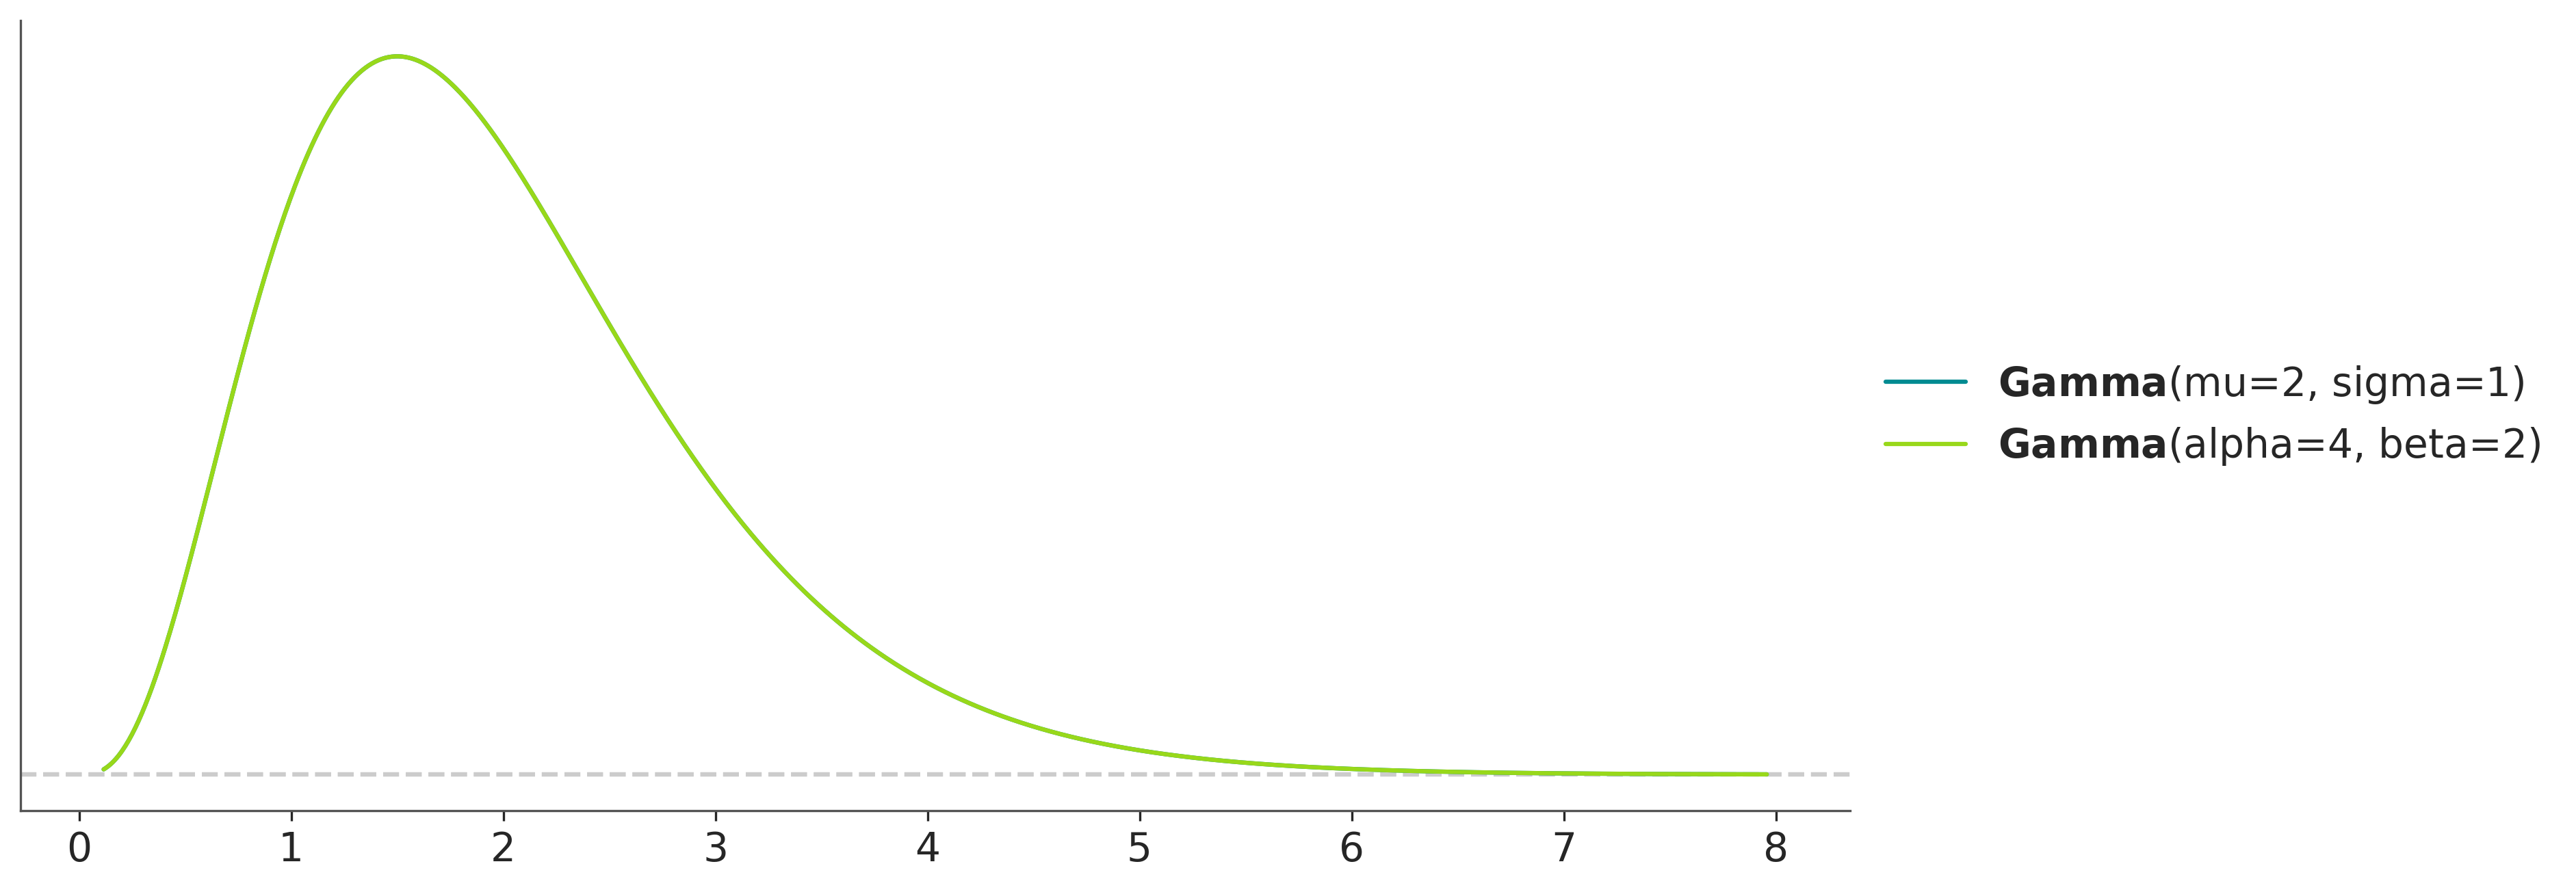

In [15]:
dist = pz.Gamma(mu=2, sigma=1)
dist.plot_pdf()
pz.Gamma(dist.alpha, dist.beta).plot_pdf(); # same distribution different parametrization.

## Visualizing distributions

Numerical values and summaries are usefull, but often we can gain a lot of understanding by visual inspection. For instance, when setting priors for Bayesian models, sometimes all we need to do is to quickly inspect the _shape_ of a distribution. We usually want to identify where the bulk of the mass is, or how thick the tails are. 

With PreliZ we can easily plot the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) of a given distribution.

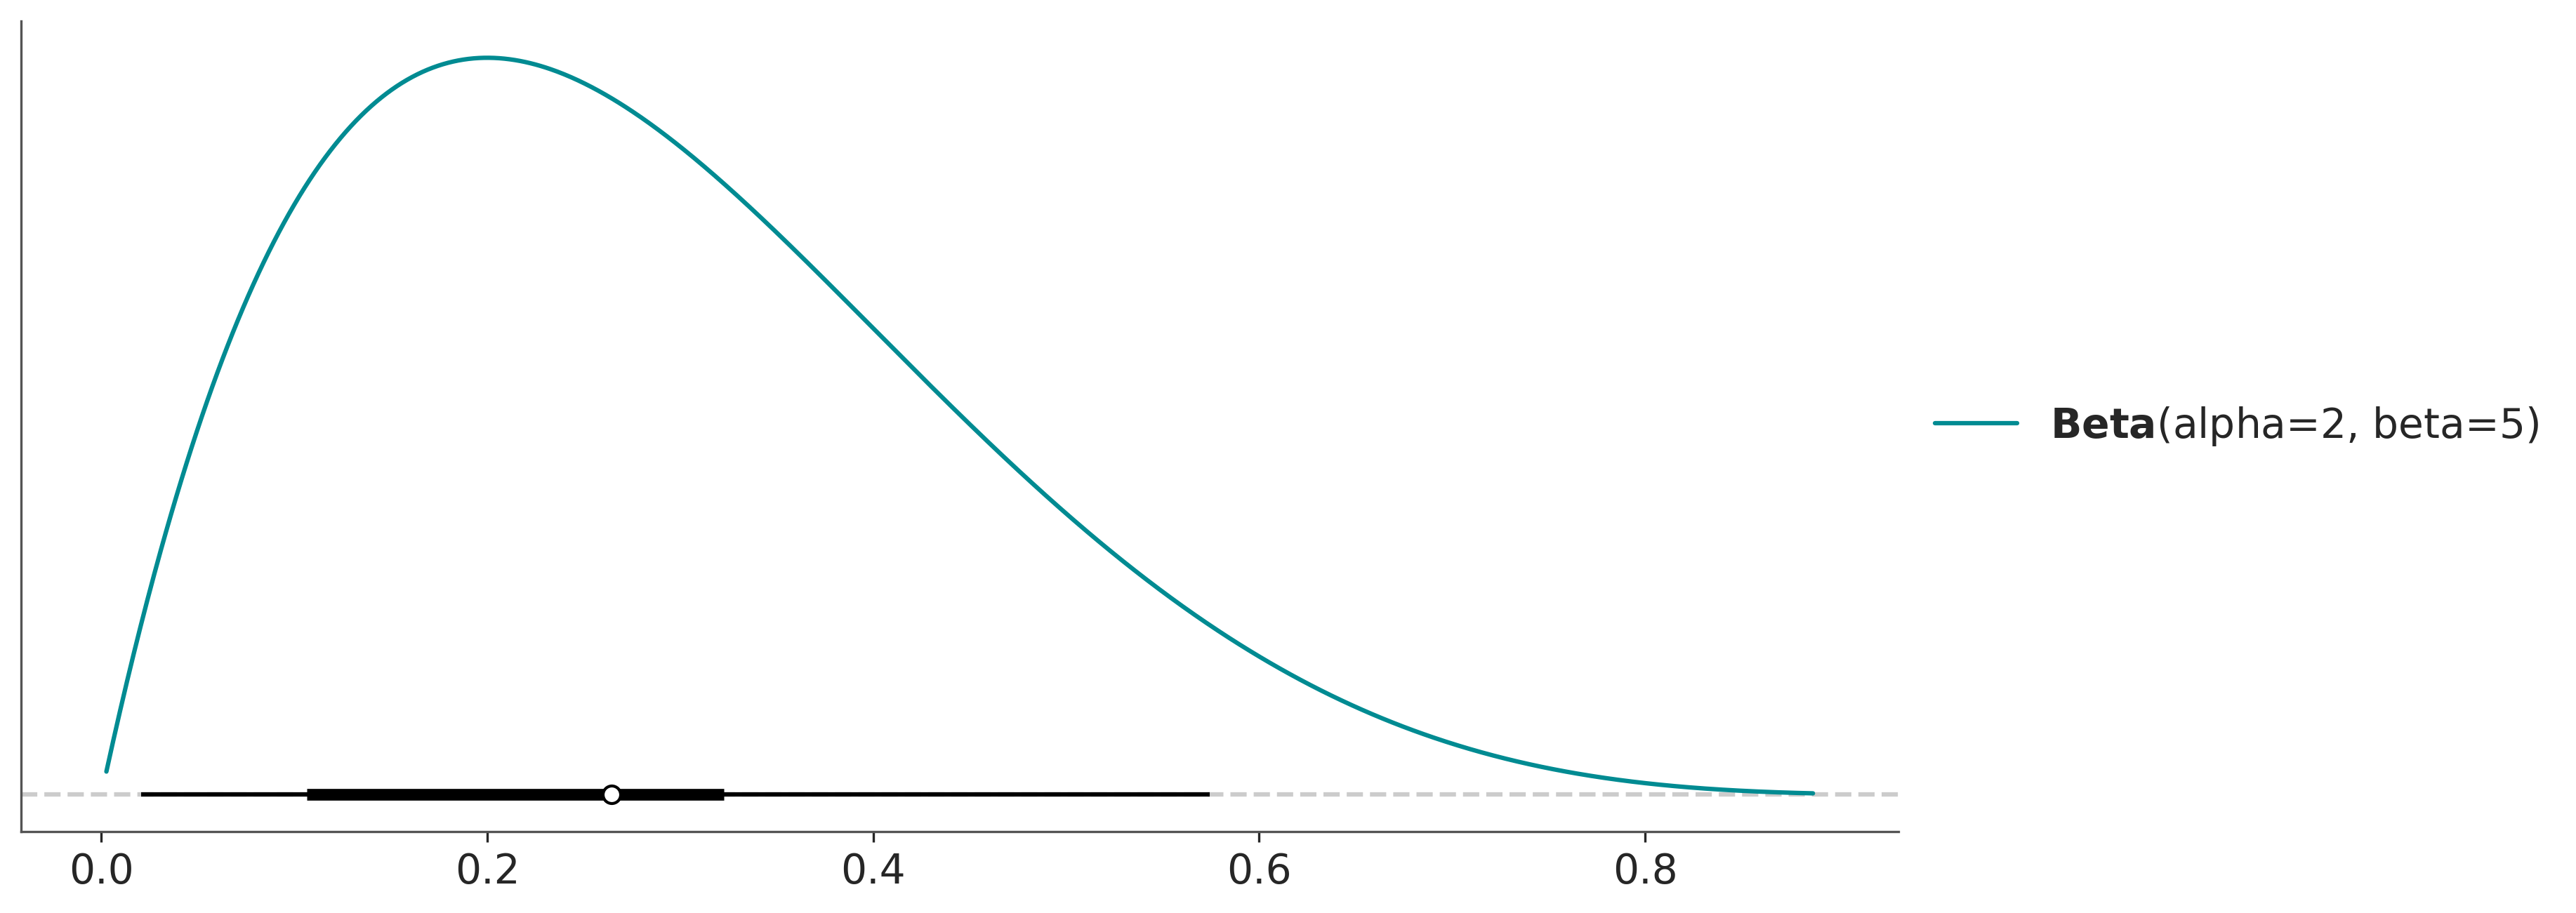

In [16]:
pz.Beta(2, 5).plot_pdf(pointinterval=True);

We get the PDF in blue, and because we passed the argument `pointinterval=True` we also get a box-plot-like element at the bottom. The white dot represents the median. If `interval='hdi'` (the default), the thicker line is the HDI 50% and the thin line is the HDI 94%. 

Alternatively, you can set `interval='eti'`, then the thicker line would be the interquartile range, which is defined by the quantiles 0.25 and 0.75 and then represents the central 50% of the distribution. The thinner line would be the interval defined by the 0.03 and 0.97 quantiles.

Discrete distributions don't have PDF, they have PMF. But for simplicity in preliz we always use the `pdf` to refer to both of them. Then for a discrete distribution we also have a `plot_pdf` method, instead of plot_pmf.

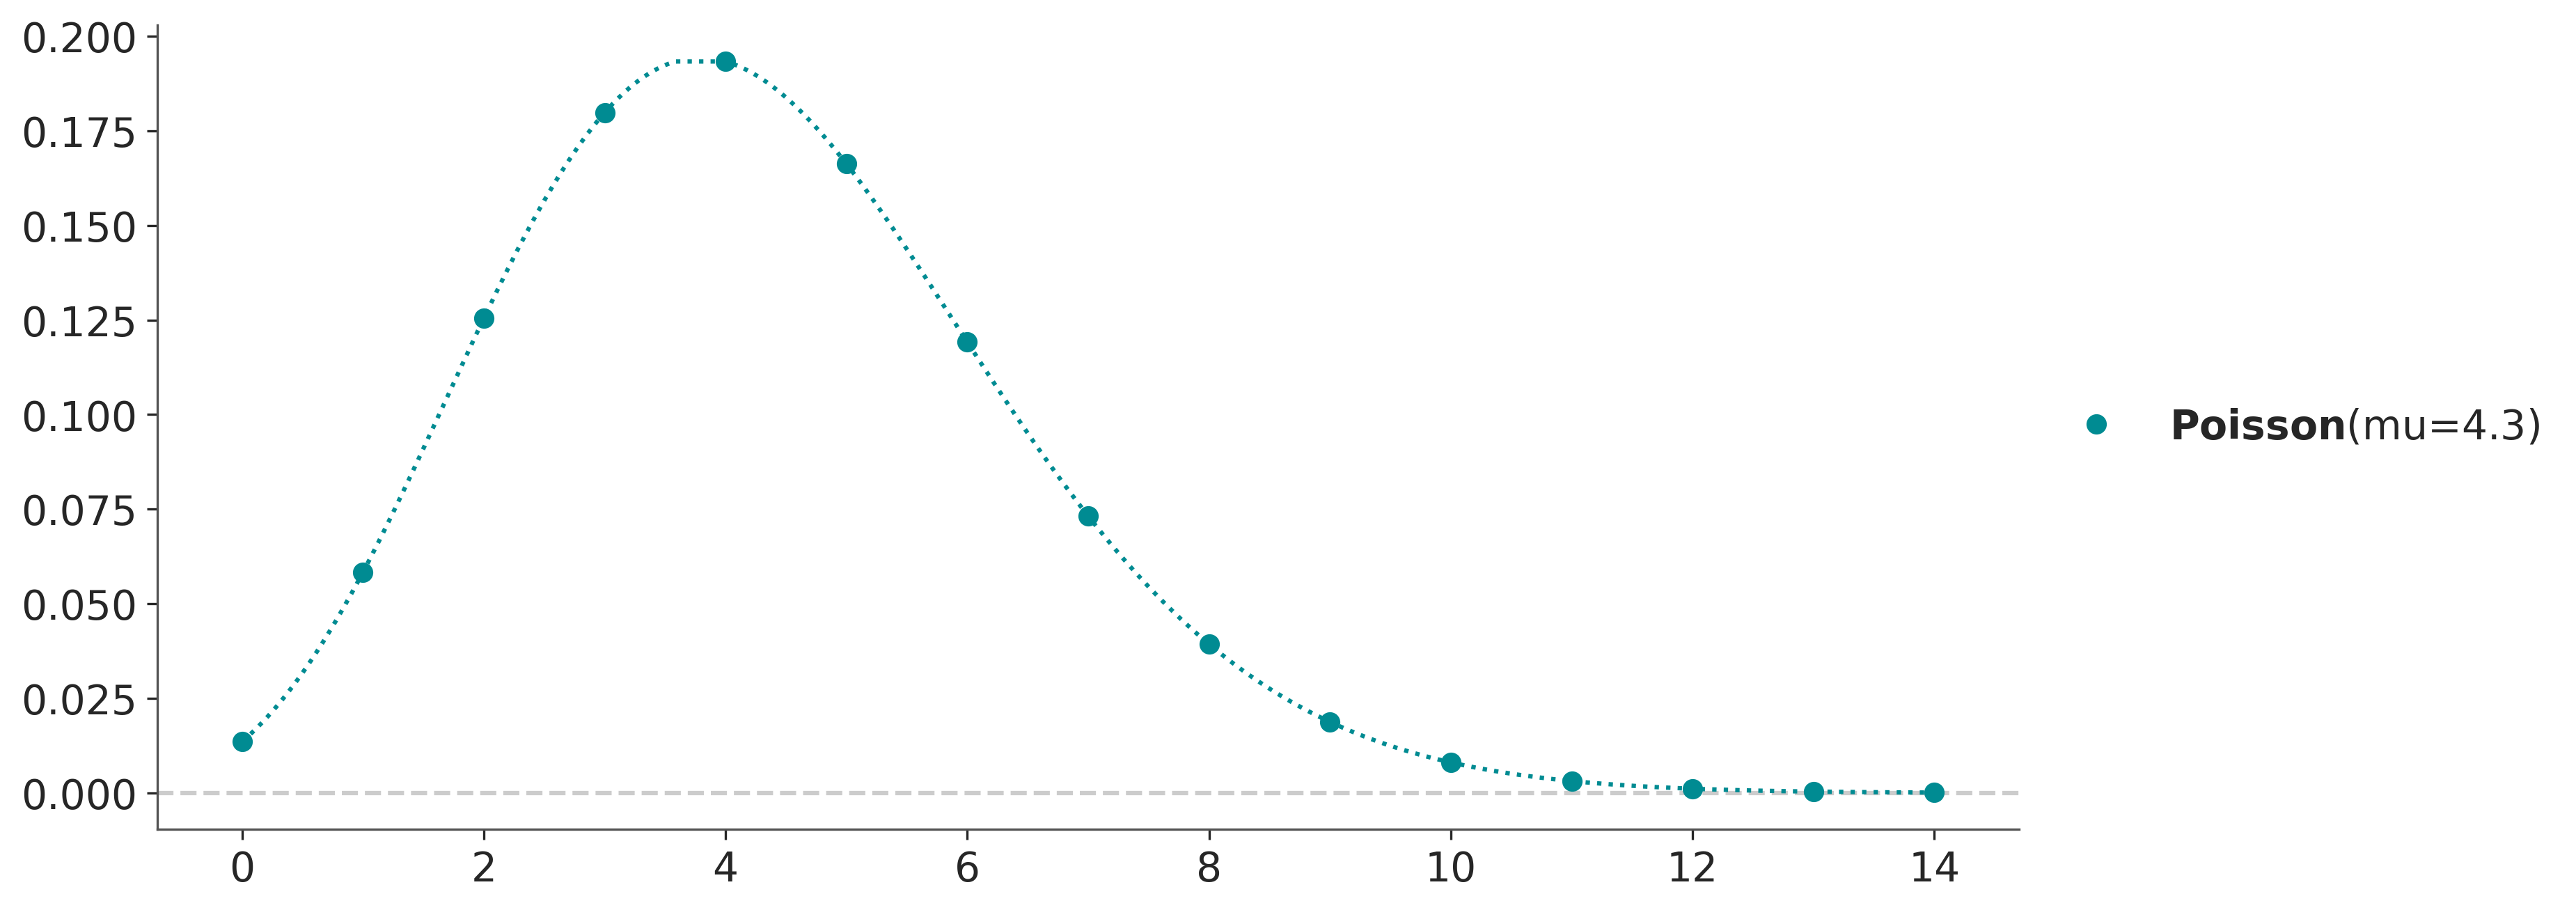

In [17]:
pz.Poisson(4.3).plot_pdf();

We can include more than one distribution in the same plot. This can be useful to compare the impact of parameters on a given distribution or even different distributions.

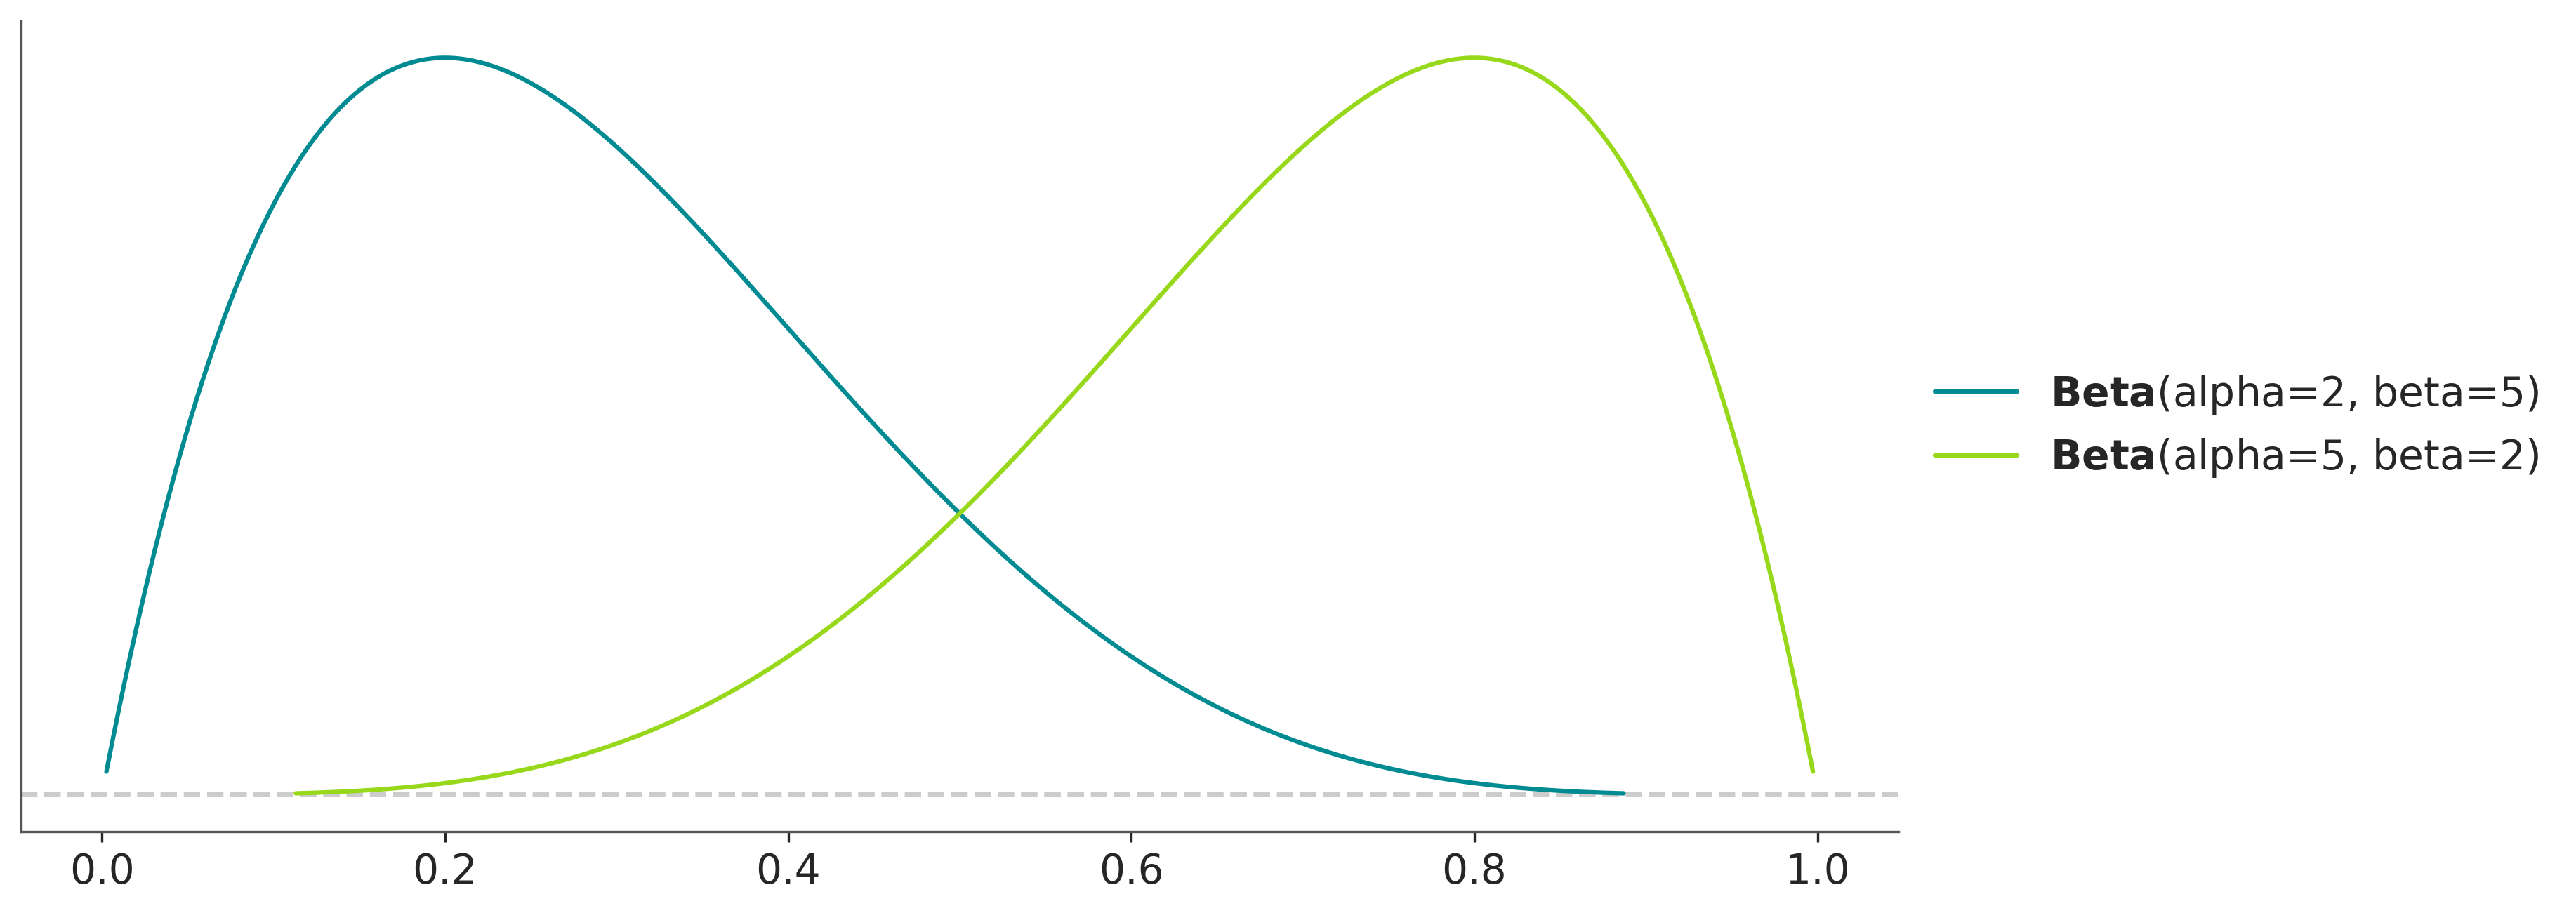

In [18]:
pz.Beta(2, 5).plot_pdf()
pz.Beta(5, 2).plot_pdf();

Other functions that are easy to plot are the [cumulative distribution function](https://en.wikipedia.org/wiki/cumulative_distribution_function).

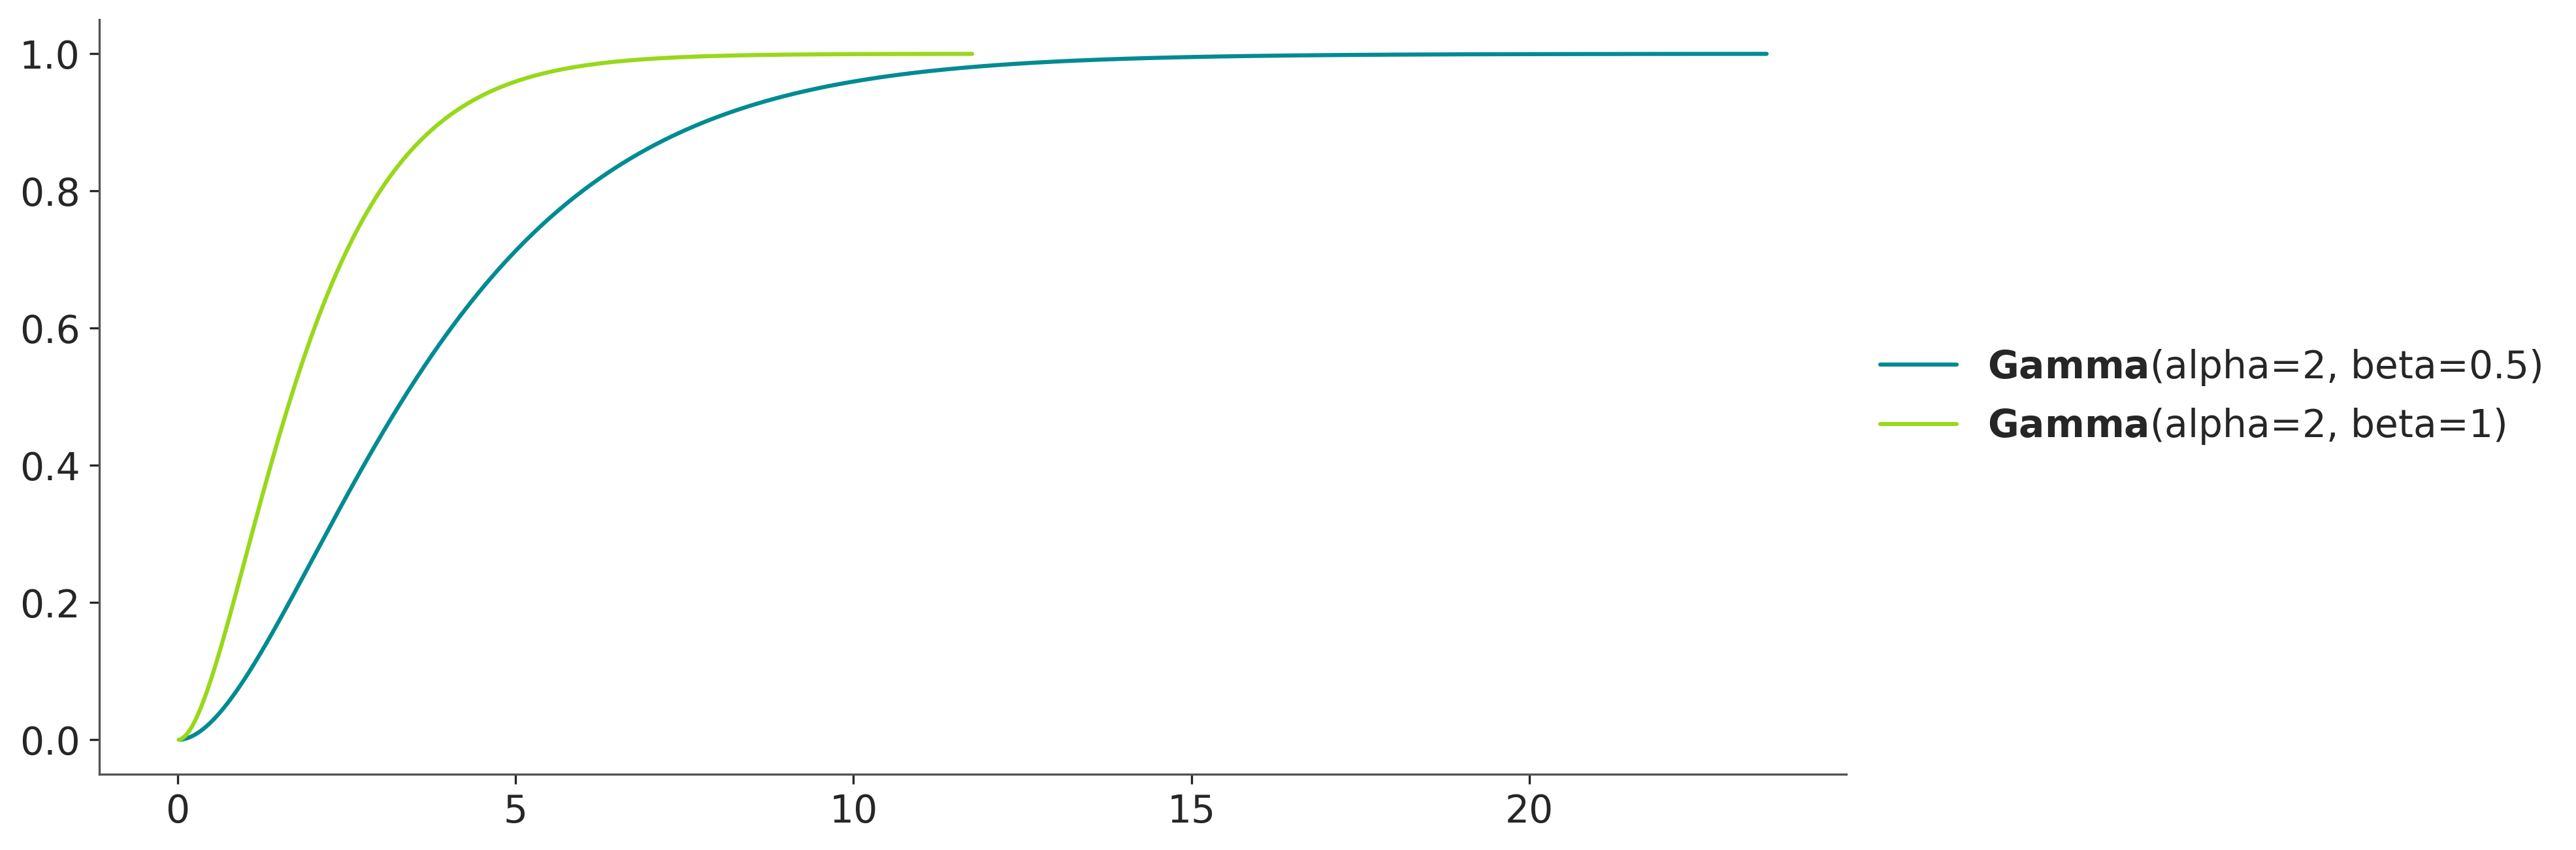

In [19]:
pz.Gamma(2, 0.5).plot_cdf()
pz.Gamma(2, 1).plot_cdf();

and the inverse of the cdf.

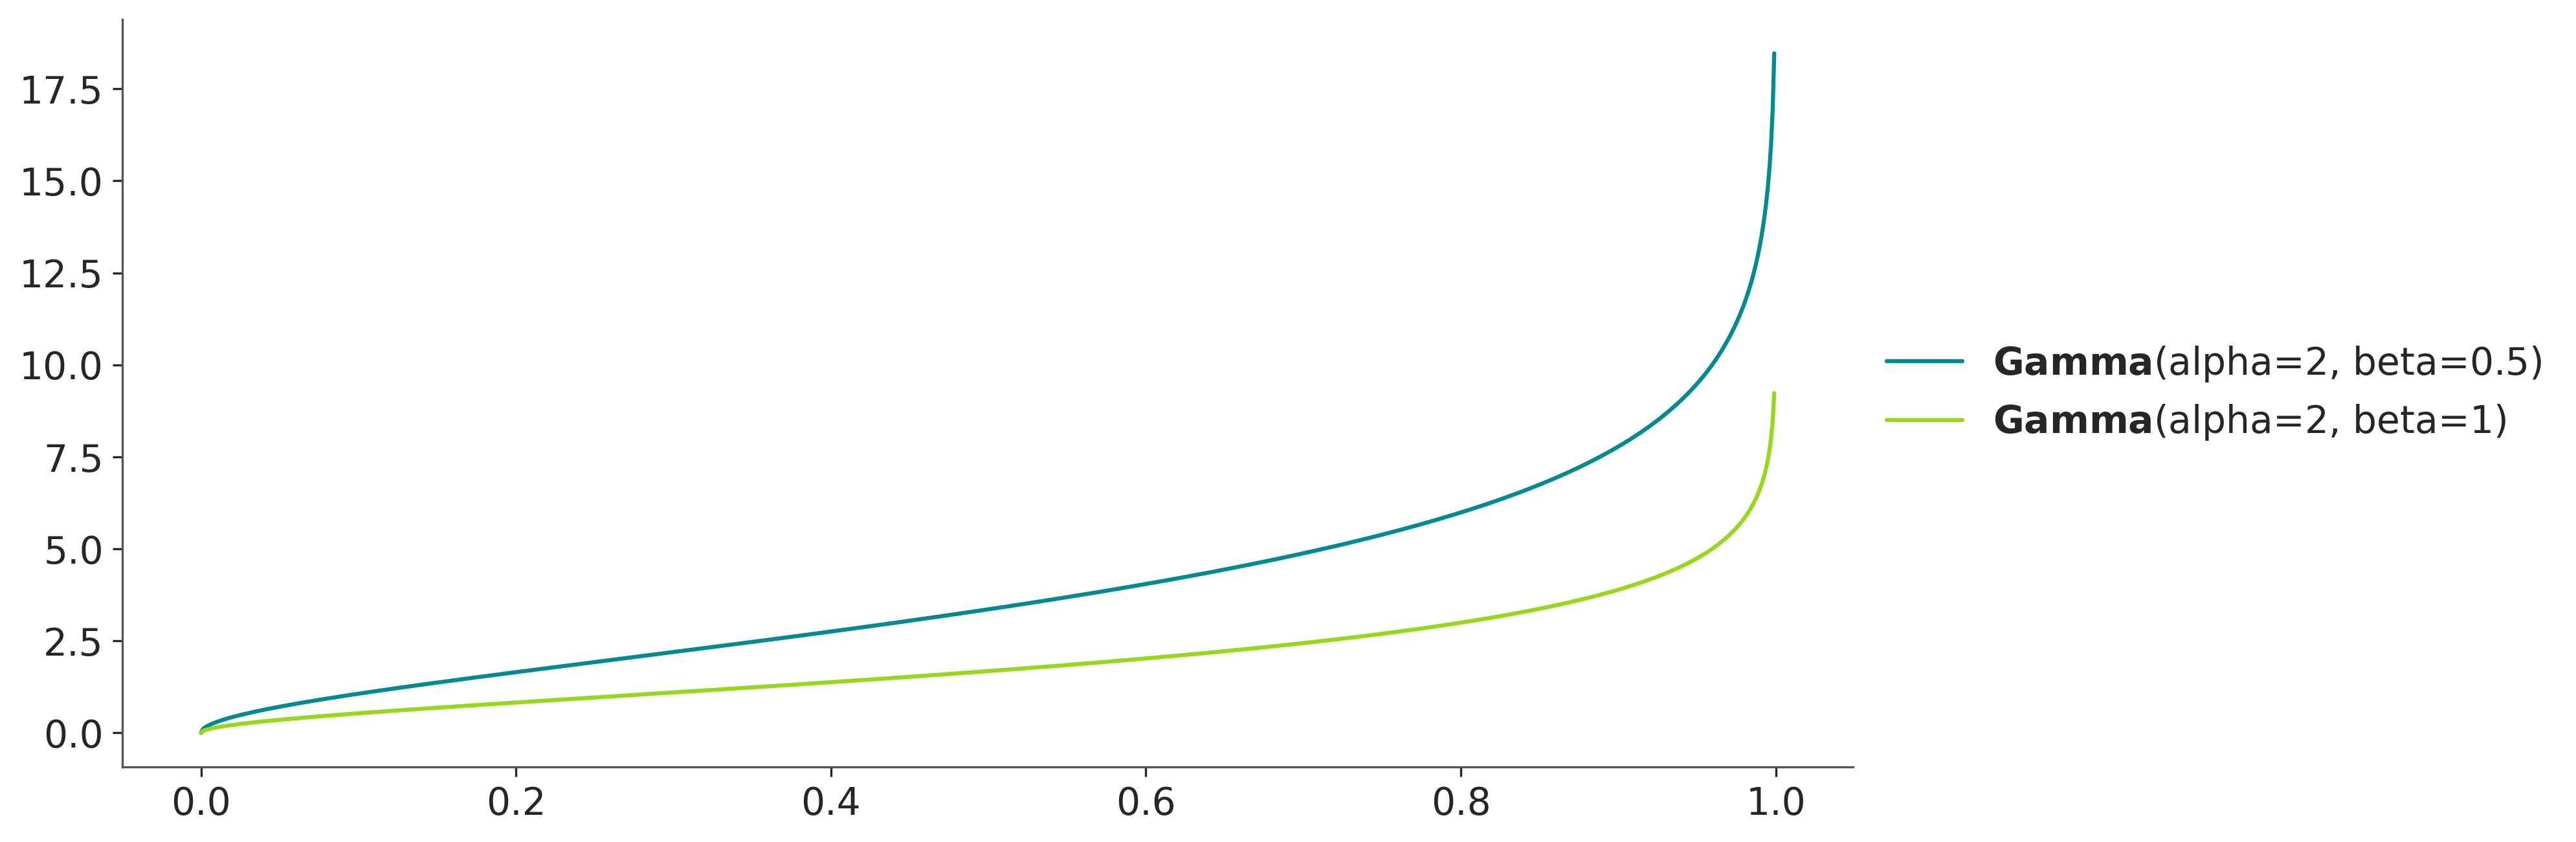

In [20]:
pz.Gamma(2, 0.5).plot_ppf()
pz.Gamma(2, 1).plot_ppf();

If we are not very familiar with a distribution, we may want to explore how the parameters affects the "shape" of the distribution. This could be easier to do interactively.

In [21]:
pz.Gamma(mu=2, sigma=1).plot_interactive()

interactive(children=(FloatSlider(value=2.0, description='mu (0, inf)', max=12.0, min=2.220446049250313e-16, s…

As a general rule, PreliZ distributions do not have default values for their parameters, as we saw at the beginning of this notebook for the Normal. Nevertheless, the `plot_interactive()` method provides a default initialization, which can be handy if we are not very familiar with the parameters a distribution can take.

In [22]:
pz.Gamma().plot_interactive()

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

The slider will conform to the bounds of the parameters, for instance the `alpha` parameter of the Gamma distribution is restricted to be positive. So the slider for alpha will also be restricted to positive values. Because there is no upper bound, PreliZ will pick one for you, if you want to try with higher values of the parameter just initialize the distribution at higher values, like 

```python
pz.Gamma(alpha=50, beta=1).plot_interactive()
```

## Distributions modifiers

PreliZ supports some special "distributions" that act as modifiers of other univariate distributions. Currently, we have:

* [Censored](Censored_gallery). A censored distribution arises when data is limited to a certain range, and values outside this range are not recorded.
* [Truncated](Truncated_gallery). Truncated distributions arise in cases where the ability to record, or even to know about, occurrences is limited to values which lie above or below a given threshold or within a specified range.
* [Mixture](Mixture_gallery). A mixture distribution is a distribution that is composed of a mixture of two or more distributions. The mixture distribution is the sum of the component distributions, weighted by the probability of each component distribution.
* [Hurdle](Hurlde_gallery). A hurdle distribution is a mixture distribution of with one process generating zeros and another non-zeros. This is different from a zero-inflated distribution, where we also have a mixture one generating zeros and another generating both zeros and positive values.

In [23]:
dist = pz.Normal(mu=0, sigma=1)
censored_dist = pz.Censored(pz.Normal(mu=0, sigma=1), lower=1)

In [24]:
dist.summary()

Normal(mean=0.0, median=0.0, std=1.0, lower=-1.88, upper=1.88)

In [25]:
censored_dist.summary()

CensoredNormal(mean=1.08, median=1.0, std=0.26, lower=1.0, upper=1.55)

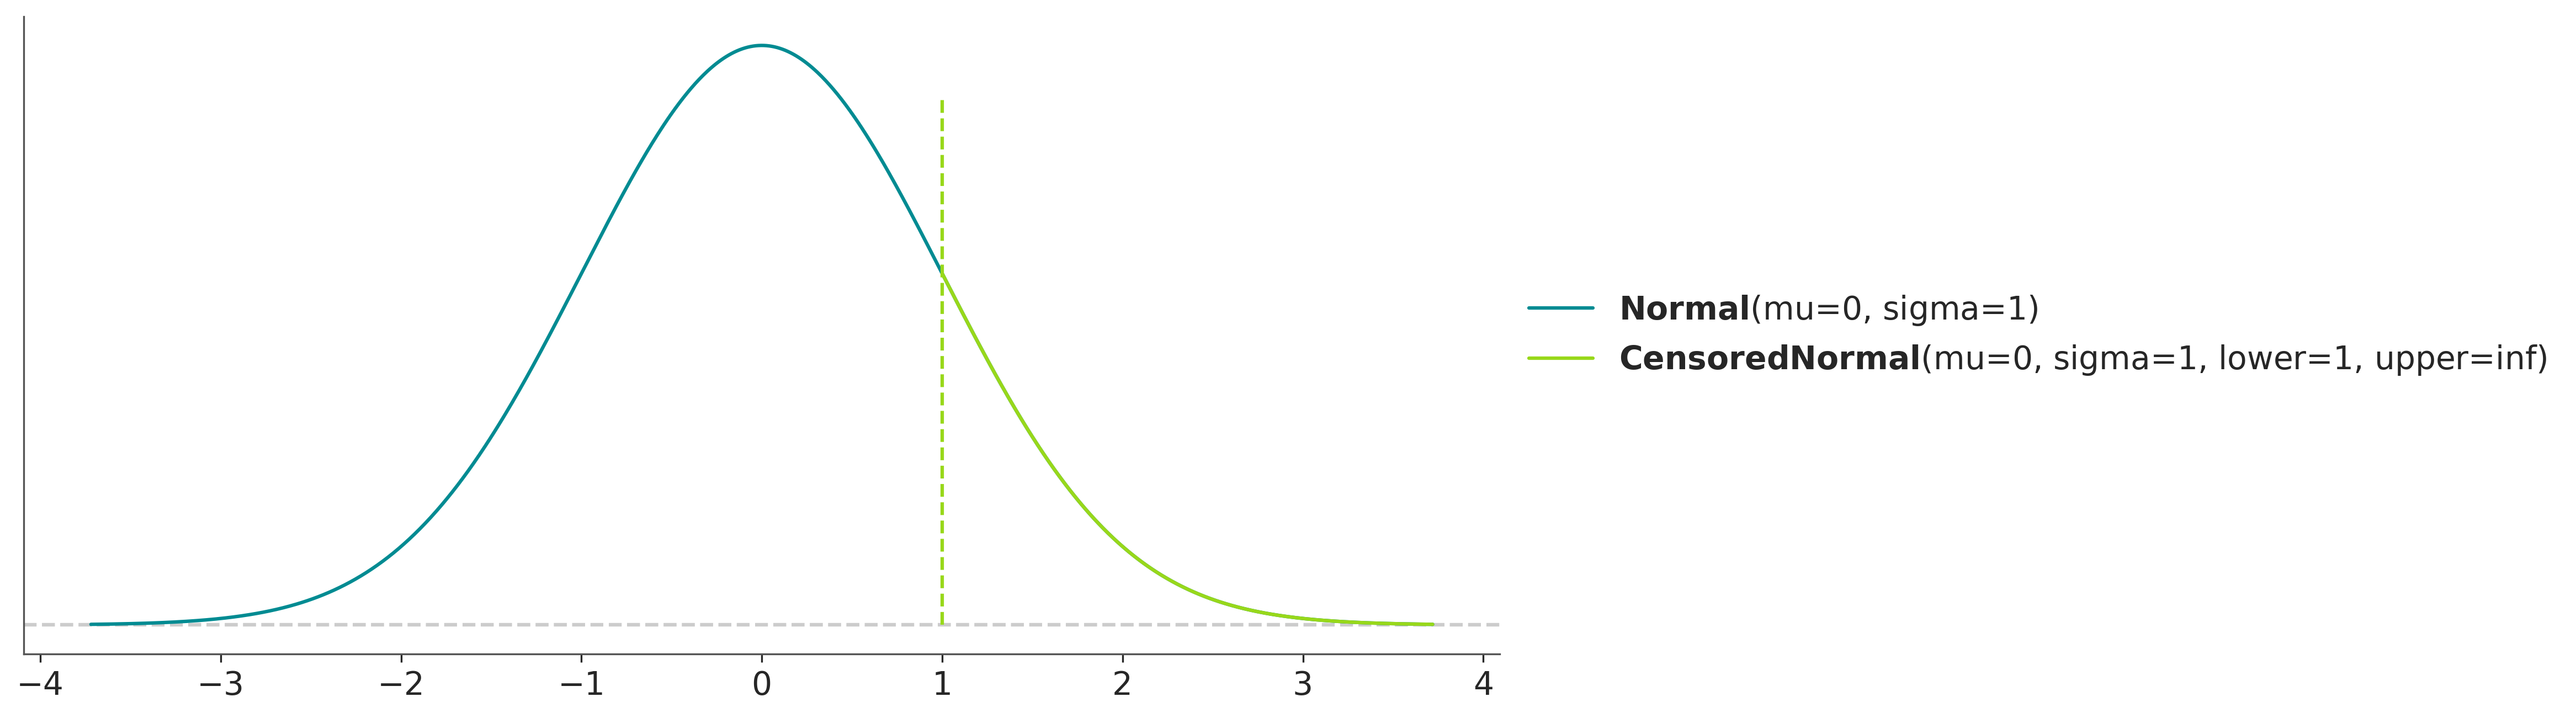

In [26]:
dist.plot_pdf()
censored_dist.plot_pdf();

## Integration with probabilistic programming languages

So far all the functionality we have discussed is very general and can be used in many settings where we need to work or explore with probability distributions. But the main focus of PreliZ is prior elicitation, that is how to define suitable prior distributions for Bayesian models. Thus, often PreliZ will be used together with probabilistic programming languages.

PreliZ, aims to be agnostic of probabilistic programming languages, allowing easy interaction with them if needed. Currently, there is a bias towards PyMC/Bambi, for instance, most distributions have the same parameterization as in these PPLs. But that's more a reflection of limited dev-time than a hard design choice.

PreliZ supports exporting distributions. Currently, only PyMC and Bambi are supported.

```python
pz.Normal(0, 1).to_pymc()
pz.Normal(0, 1).to_bambi()
```

For these methods to work you need to have installed PyMC and/or Bambi. 

In other notebooks we will discuss methods more directly focus on prior elicitation, and also other ways to interact with PPLs.